# Cardio Good Fitness Case Study - Descriptive Statistics

### Customer variables to study:
#### Meta data
  - Product purchased, TM195, TM498, or TM798; 
  - Gender; 
  - Age, in years; 
  - Education, in years; 
  - Relationship status, single or partnered; 
  - Annual household income ; 
  - Average number of times the customer plans to use the treadmill each week; 
  - Average number of miles the customer expects to walk/run each week; 
  - Self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.



In [3]:
# Load the necessary packages
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load the Cardio Dataset

df = pd.read_csv('CardioGoodFitness.csv')

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


min, 25% (Lower quartile) , 50% (Median), 75% (Upper quartile) , max is called the **Distribution of data**
<br>**Symmetric distribution:** Mean = Median

**std:** Standard deviation - How far from the average am i? We use root because if root not taken **The +ve deviation neutralise -ve deviation**
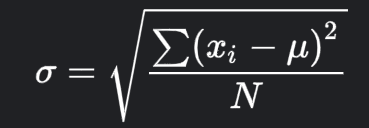

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015757380248>,
      dtype=object)

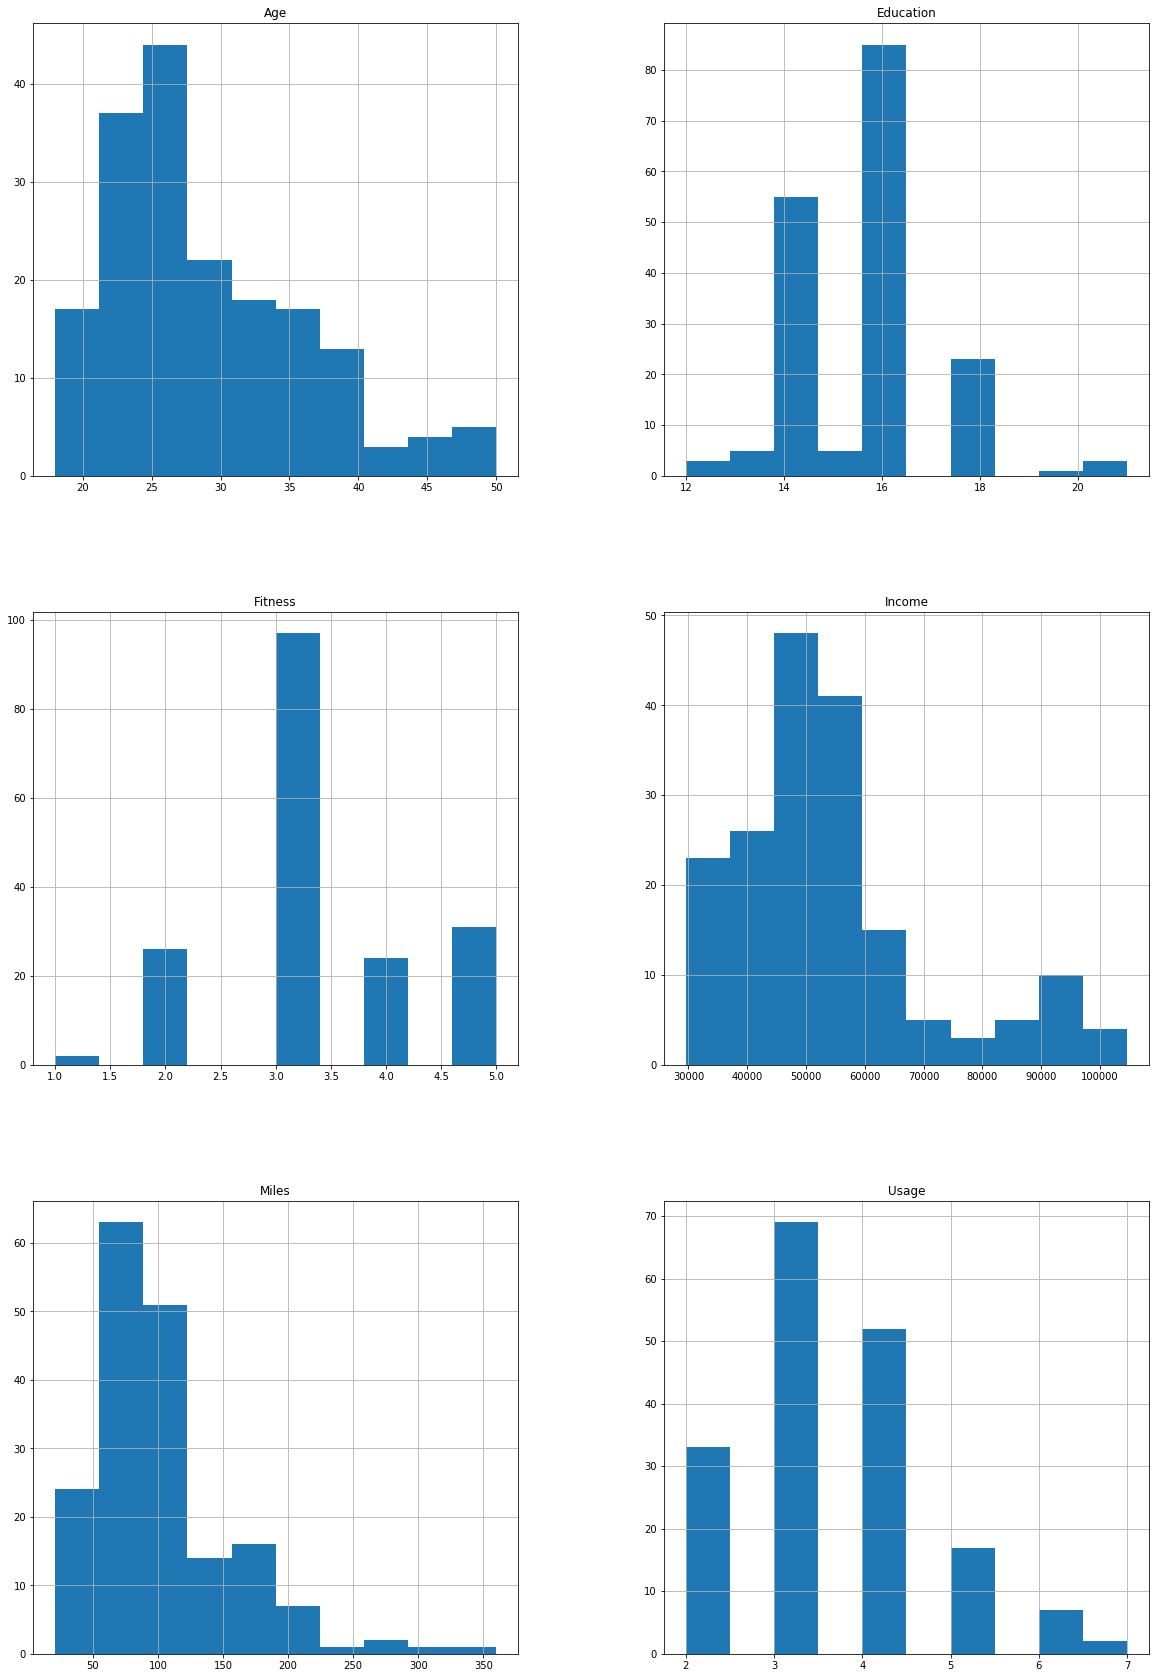

In [16]:
df.hist(figsize=(20,30))   #PLots histogram for all the series with numeric value

#### The .hist() used above is from pandas lib and not seaborn

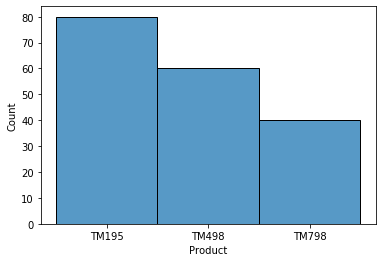

In [17]:
sns.histplot(df['Product'])    #Plotting histogram for single series

In [10]:
sf_cols = list(df.columns)
sf_cols

['Product',
 'Age',
 'Gender',
 'Education',
 'MaritalStatus',
 'Usage',
 'Fitness',
 'Income',
 'Miles']

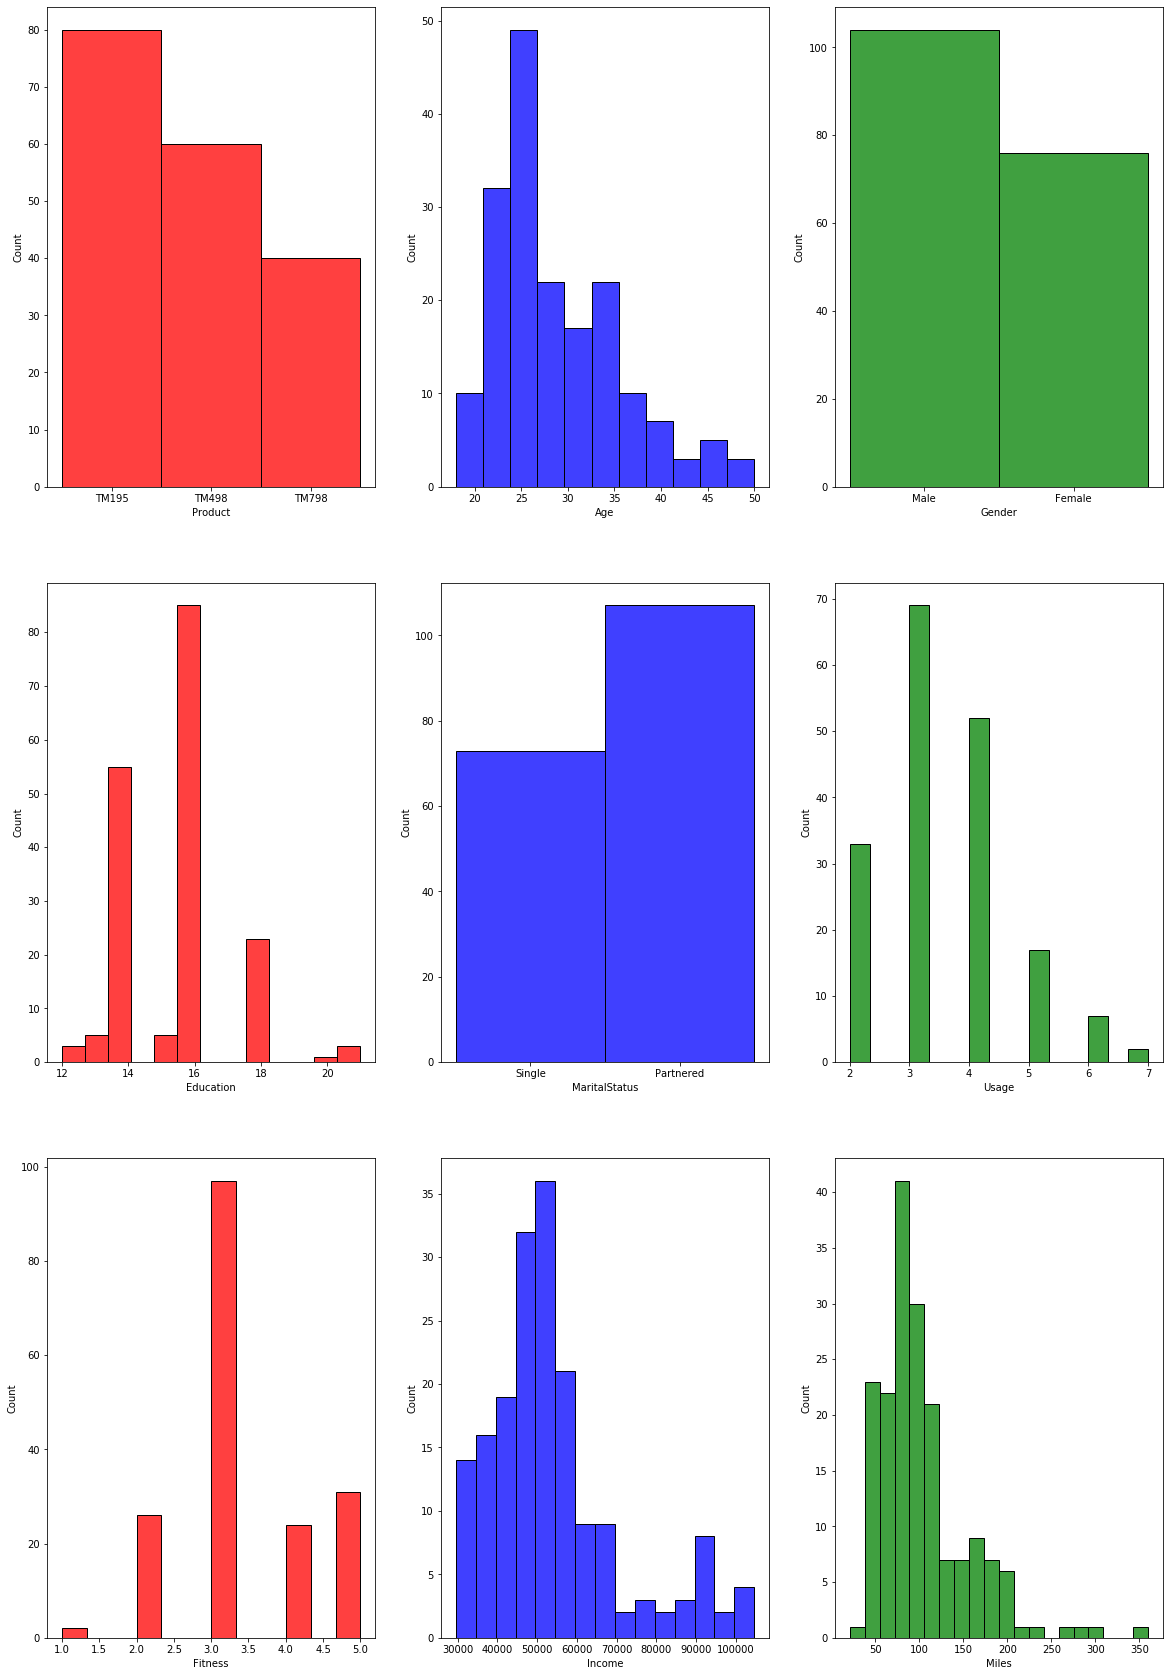

In [19]:
#Histogram for all series
# Using seaborn (Not pandas) - Hit is used also for non numeric data type
fig, axs = plt.subplots(nrows = 3,ncols = 3, figsize = (20,30))    #Code for plotting the canvas
color = [['red', 'blue', 'green'],['red', 'blue', 'green'],['red', 'blue', 'green']]
for i in range(0, len(sf_cols)):
    #Below code is used to access each plot in canvas
    rows = i // 3   #0 0 0 
    cols = i % 3    #0 1 2 
    ax = axs[rows, cols]
    sns.histplot(df[sf_cols[i]], ax=ax, color = color[rows][cols] )

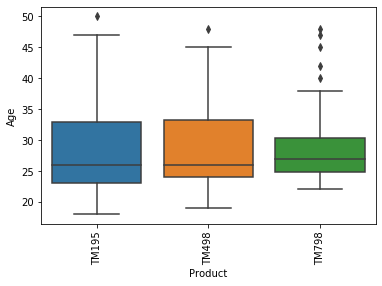

In [23]:
plot = sns.boxplot(x="Product", y="Age", data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

The middle line in box plot shows median<br>
The box represents the upper quartile and lower quartile.<br>
The extended line (Whisker line) is 1.5 times the upper quartile.<br>
If there are outliers, the points are shown above whisker 

### Cross tabs are used for non numeric data in both axis

In [21]:
pd.crosstab(df['Product'],df['Gender'] )   #Cross tabulations

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [15]:
pd.crosstab(df['Product'],df['MaritalStatus'])   #Cross tabulations

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


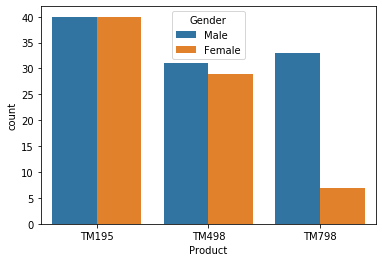

In [27]:
sns.countplot(data = df, x="Product", hue="Gender")

In [34]:
pd.pivot_table(df, index=['Product', 'Gender'], columns=[ 'MaritalStatus'] ,aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [49]:
pd.pivot_table(df,'Income', index=['Product', 'Gender'],columns=[ 'MaritalStatus'])  
#By default the aggfunc in pivot table is average (np.mean)

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

In [48]:
pd.pivot_table(df,'Miles', index=['Product', 'Gender'],columns=[ 'MaritalStatus'])

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   74.925926   78.846154
        Male     80.190476   99.526316
TM498   Female   94.000000   80.214286
        Male     87.238095   91.100000
TM798   Female  215.000000  133.333333
        Male    176.315789  147.571429

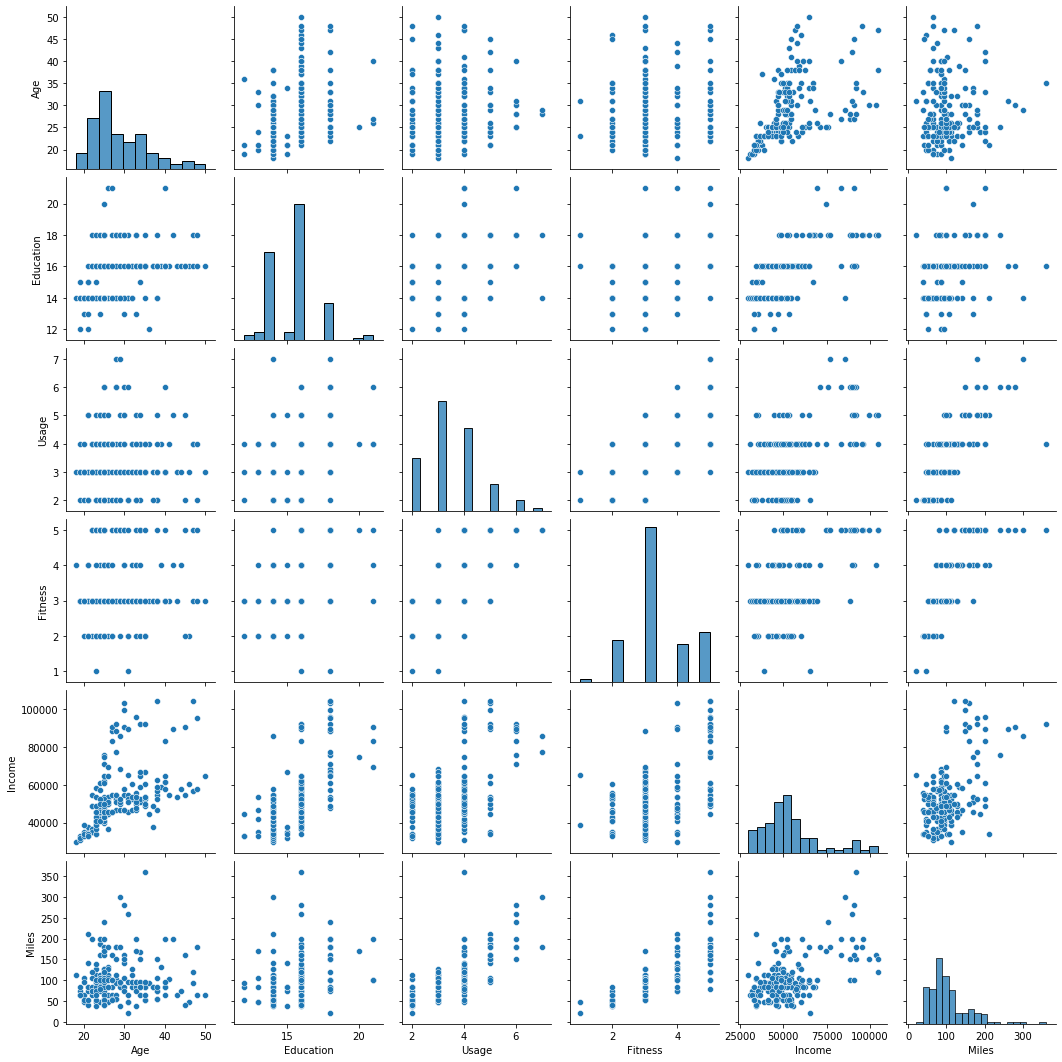

In [25]:
sns.pairplot(df)

Here in the first row and first column, Age vs Age (Same series) makes no sense. So it instead plots a **histogram**<br>
In other cases it scatter plots for the other attributes<br>
**Pair plots ignores object datatypes**

In [25]:
#Get standard deviation of all the columns

std_cols = list(df.select_dtypes(['int64','float64']).columns)
for i in range(0, len(std_cols)):
    print(std_cols[i]," : ",df[str(std_cols[i])].std())

Age  :  6.943498135399795
Education  :  1.6170548978065553
Usage  :  1.0847970343962445
Fitness  :  0.958868565619312
Income  :  16506.68422623862
Miles  :  51.86360466180934


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bade860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1bc68518>], dtype=object)

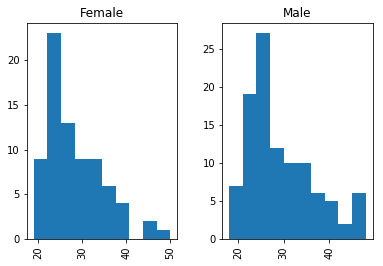

In [58]:
mydata.hist(by='Gender',column = 'Age')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bba48d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1b9cedd8>], dtype=object)

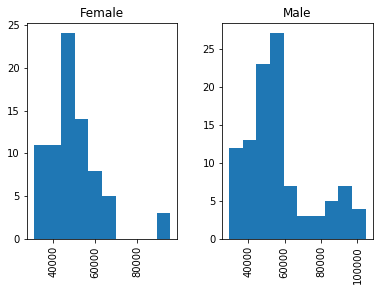

In [59]:
mydata.hist(by='Gender',column = 'Income')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a5c3cc0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a19e4b828>], dtype=object)

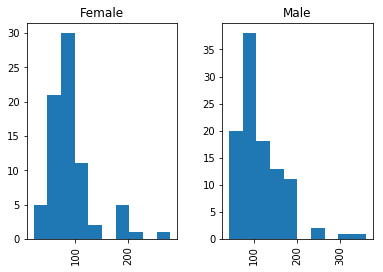

In [60]:
mydata.hist(by='Gender',column = 'Miles')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002295321BE88>,
      dtype=object)

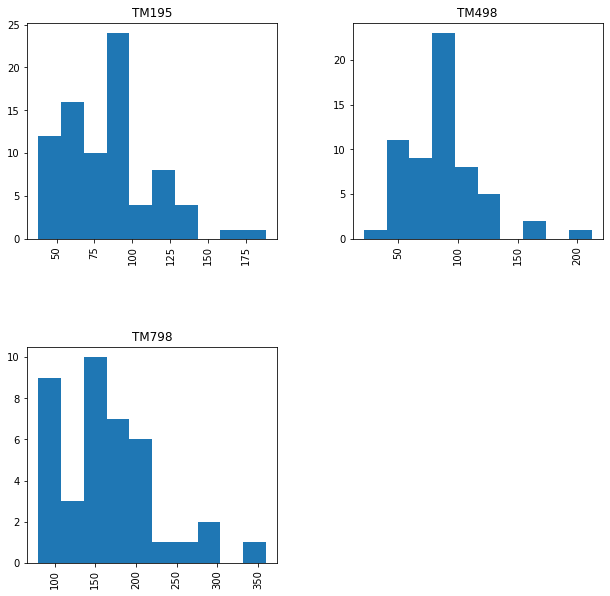

In [7]:
df.hist(by='Product',column = 'Miles', figsize=(10,10))

In [9]:
corr = df.apply(lambda x:x.factorize()[0]).corr()   #Factorize is used to convert the data from object to numbers
corr

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.049478,-0.230653,0.388551,-0.017602,0.524496,0.502300,0.776126,0.890248
Age,0.049478,1.000000,-0.038321,0.340898,0.178846,0.012404,0.051002,0.400836,0.035600
Gender,-0.230653,-0.038321,1.000000,-0.151848,0.018836,-0.168490,-0.123892,-0.207216,-0.260652
Education,0.388551,0.340898,-0.151848,1.000000,0.100145,0.322078,0.299648,0.552451,0.354187
MaritalStatus,-0.017602,0.178846,0.018836,0.100145,1.000000,0.024432,0.019417,0.072283,-0.009787
Usage,0.524496,0.012404,-0.168490,0.322078,0.024432,1.000000,0.435191,0.592394,0.603085
Fitness,0.502300,0.051002,-0.123892,0.299648,0.019417,0.435191,1.000000,0.538672,0.512896
Income,0.776126,0.400836,-0.207216,0.552451,0.072283,0.592394,0.538672,1.000000,0.755796
Miles,0.890248,0.035600,-0.260652,0.354187,-0.009787,0.603085,0.512896,0.755796,1.000000


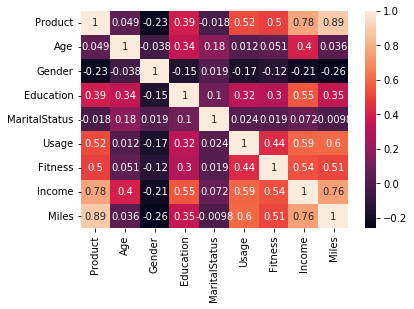

In [10]:
sns.heatmap(corr, annot=True)

# SIMPLE REGRESSION MODEL

In [13]:
# Simple Linear Regression
#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = df['Miles']
X = df[['Usage','Fitness']]

# Train the model using the training sets
regr.fit(X,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
regr.coef_

array([ 20.21486334,  27.20649954])

In [98]:
regr.intercept_

-56.742881784648617

In [32]:
regrtab = df.loc[(df['Usage'] == 2) & (df['Fitness'] == 3)]
regrtab.reset_index()

,index,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,1,TM195,19,Male,15,Single,2,3,31836,75
1,9,TM195,21,Female,15,Partnered,2,3,37521,85
2,16,TM195,23,Female,14,Single,2,3,34110,103
3,24,TM195,24,Male,14,Single,2,3,45480,113
4,28,TM195,25,Male,14,Partnered,2,3,45480,56
5,43,TM195,27,Female,14,Partnered,2,3,45480,56
6,44,TM195,28,Female,14,Partnered,2,3,46617,56
7,45,TM195,28,Female,16,Partnered,2,3,52302,66
8,69,TM195,38,Female,14,Partnered,2,3,54576,56
9,70,TM195,38,Male,14,Single,2,3,52302,56


In [47]:
miles = np.array(regrtab['Miles'])
print(np.median(miles))
print(np.mean(miles))

64.0
70.83333333333333


In [45]:
regr.predict([[2,3]])

array([65.30634351])